In [724]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib as mplstyle
import matplotlib.pyplot as plt
import locale
from locale import atof
from dateutil import parser
from datetime import datetime

plt.style.use('fivethirtyeight')

In [725]:
df_incomeLimits = pd.read_csv('school_choice_data/imported_data/income_limits.csv')
df_studentByGrade = pd.read_csv('school_choice_data/imported_data/student_by_grade.csv')
df_studentParticipation = pd.read_csv('school_choice_data/imported_data/student_participation_num.csv')
df_schoolParticipation = pd.read_csv('school_choice_data/imported_data/school_participation.csv')
df_enrollment = pd.read_csv('school_choice_data/imported_data/enrollment.csv')
df_previouslyPublicSchool = pd.read_csv('school_choice_data/imported_data/previous_public_school.csv')
df_studentPathway = pd.read_csv('school_choice_data/imported_data/student_by_pathway.csv')
df_studentEthnicity = pd.read_csv('school_choice_data/imported_data/student_by_ethnicity.csv')
df_studentGender = pd.read_csv('school_choice_data/imported_data/student_by_gender.csv')
df_studentGeography = pd.read_csv('school_choice_data/imported_data/student_by_geography.csv')
df_schoolAwardCount = pd.read_csv('school_choice_data/imported_data/awards_by_school_16_clean.csv')
df_schoolAwardAmount = pd.read_csv('school_choice_data/imported_data/amount_by_school_16_clean.csv')
df_schoolEnrollment = pd.read_csv('school_choice_data/gov_data/EnrollmentGradeSchls.csv')
df_schoolSpecEdEnrollment = pd.read_csv('school_choice_data/gov_data/EnrollmentEnglishLearnerSpecEdSchls.csv')
df_schoolSpecEdEnrollmentALL = pd.read_csv('school_choice_data/gov_data/EnrollmentEnglishLearnerSpecEdSchls_ALL.csv')
df_vouchersByOgSchoolDistrict = pd.read_csv('school_choice_data/imported_data/voucher-students-by-original-school-district.csv')
df_publicSpecEd = pd.read_csv('school_choice_data/gov_data/PublicEnrollmentEnglishLearnerSpecEd.csv')

In [726]:
# Functions

# normalize numbers
def normalizeNums(num):
    if (math.isnan(num)):
        return None
    else:
        num = int(math.floor(num))
        return num
    
# multiply by 100 to convert from percent
def convertPercent(num):
    return num * 100

# normalize percent from x%
def normalizePerc(num):
    return float(num.strip('%'))
    

# get average award
def averageAward(awardCount, awardAmount):
    if math.isnan(awardAmount) or math.isnan(awardCount):
        return None
    return round((awardAmount/awardCount),2)

# Convert NaN to zeros
# the zeros do not always indicate that no students 
# were in the program. schools with less than ten 
# students do not have to report 
def convertInt(num):
    if math.isnan(num):
        return 0
    else:
        return int(num)
    
# calculate percent
def calcPerc(num, denom):
    if num != 0:
        percent = (float(num/denom))*100
        return round(percent,2)
    else:
        return None
    
# calculate percent change
def percentChange(oldVal, newVal):
    val1 = float(oldVal)
    val2 = float(newVal)
    change = (val2-val1)/val1
    return float(change)

# fill in missing values
def fillInfo(choiceCell, backupCell):
    if pd.isnull(choiceCell):
        return backupCell
    else:
        return choiceCell
    
# replace with None
def fillNone(num):
    if num == 1:
        return None
    else:
        return num 

In [727]:
df_studenByGradeNoTotal = df_studentByGrade.drop(13)
df_studenByGradeNoTotal

,Grade,2011,2012,2013,2014,2015,2016
0,KG,NaN,NaN,1285,1809,1775,1835
1,1,168.0,1488.0,2766,3118,3219,3107
2,2,516.0,1044.0,2418,3223,3390,3368
3,3,519.0,1007.0,1987,3005,3416,3540
4,4,441.0,951.0,2008,2755,3166,3426
5,5,459.0,833.0,1789,2704,2988,3221
6,6,435.0,980.0,1657,2463,2911,2967
7,7,359.0,746.0,1621,2209,2513,2845
8,8,275.0,558.0,1266,2181,2309,2480
9,9,360.0,686.0,1158,1800,2113,2079


(0, 4500)

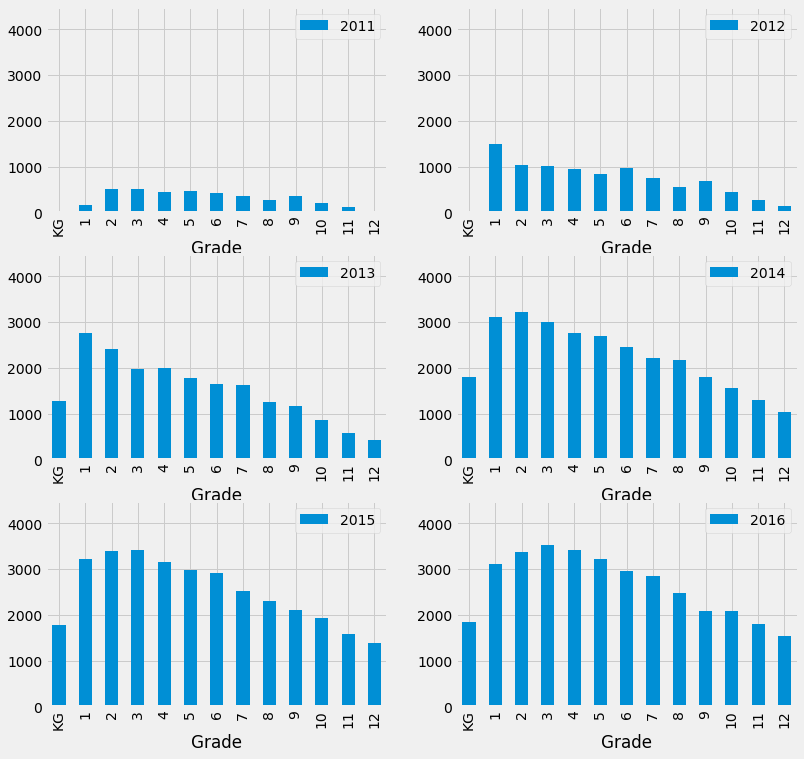

In [728]:
studentsByGrade = fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(12,12), sharex=False, sharey=False)


df_studenByGradeNoTotal.plot(kind='bar',x='Grade',y='2011',ax=ax1).set_ylim([0,4500])
df_studenByGradeNoTotal.plot(kind='bar',x='Grade',y='2012',ax=ax2).set_ylim([0,4500])
df_studenByGradeNoTotal.plot(kind='bar',x='Grade',y='2013',ax=ax3).set_ylim([0,4500])
df_studenByGradeNoTotal.plot(kind='bar',x='Grade',y='2014',ax=ax4).set_ylim([0,4500])
df_studenByGradeNoTotal.plot(kind='bar',x='Grade',y='2015',ax=ax5).set_ylim([0,4500])
df_studenByGradeNoTotal.plot(kind='bar',x='Grade',y='2016',ax=ax6).set_ylim([0,4500])

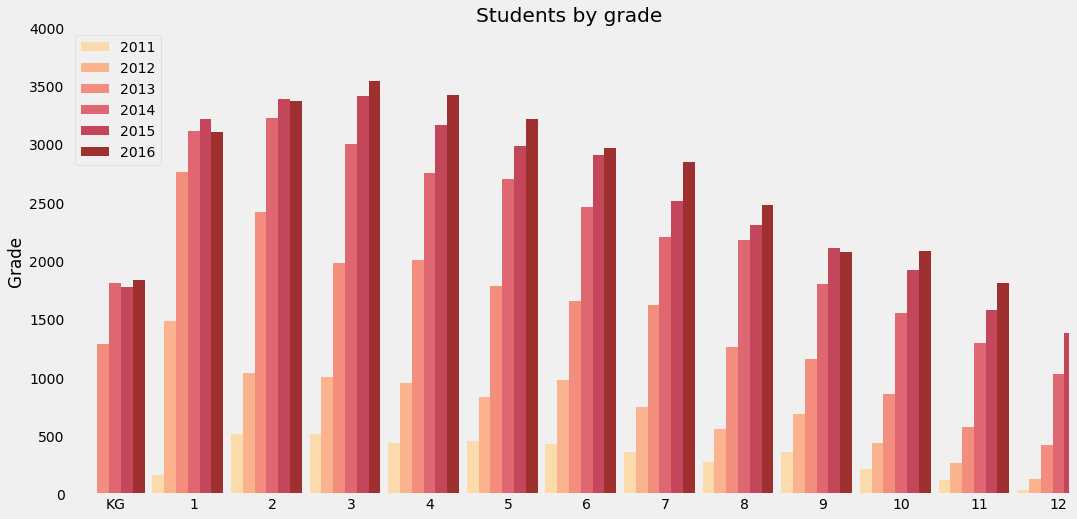

In [729]:
# Setting the positions and width for the bars
pos = list(range(len(df_studenByGradeNoTotal['2011'])))
width = 0.15

# Plotting the bars
fig, ax = plt.subplots(figsize=(16,8))

# Create a bar with 2011 data
plt.bar(pos, 
        df_studenByGradeNoTotal['2011'], 
        width, 
        alpha=0.8, 
        color='#ffd59b', 
        label=df_studenByGradeNoTotal['Grade'][0])

# Create a bar with 2012 data
plt.bar([p + width for p in pos], 
        df_studenByGradeNoTotal['2012'], 
        width, 
        alpha=0.8, 
        color='#ffa474', 
        label=df_studenByGradeNoTotal['Grade'][1])

# Create a bar with 2013 data
plt.bar([p + width*2 for p in pos], 
        df_studenByGradeNoTotal['2013'], 
        width, 
        alpha=0.8, 
        color='#f47461', 
        label=df_studenByGradeNoTotal['Grade'][2])

# Create a bar with 2014 data
plt.bar([p + width*3 for p in pos], 
        df_studenByGradeNoTotal['2014'], 
        width, 
        alpha=0.8, 
        color='#db4551', 
        label=df_studenByGradeNoTotal['Grade'][3])

# Create a bar with 2015 data
plt.bar([p + width*4 for p in pos], 
        df_studenByGradeNoTotal['2015'], 
        width, 
        alpha=0.8, 
        color='#b81b34', 
        label=df_studenByGradeNoTotal['Grade'][4])

# Create a bar with 2016 data
plt.bar([p + width*5 for p in pos], 
        df_studenByGradeNoTotal['2016'], 
        width, 
        alpha=0.8, 
        color='#8b0000', 
        label=df_studenByGradeNoTotal['Grade'][5])

# Set the y axis label
ax.set_ylabel('Grade')

# Set the chart's title
ax.set_title('Students by grade')

# Set the position of the x ticks
ax.set_xticks([p + 3 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_studenByGradeNoTotal['Grade'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 4000])

# Adding the legend and showing the plot
plt.legend(['2011', '2012', '2013', '2014', '2015', '2016'], loc='upper left')
plt.grid()
plt.show()

In [730]:
df_studentParticipation
df_schoolParticipation

,Year,School Count,Change from Previous Year,Percent Change from Previous Year
0,2011,241,NaN,NaN
1,2012,289,48.0,0.1990
2,2013,313,24.0,0.0830
3,2014,314,1.0,0.0030
4,2015,316,2.0,0.0064
5,2016,313,-3.0,-0.0095


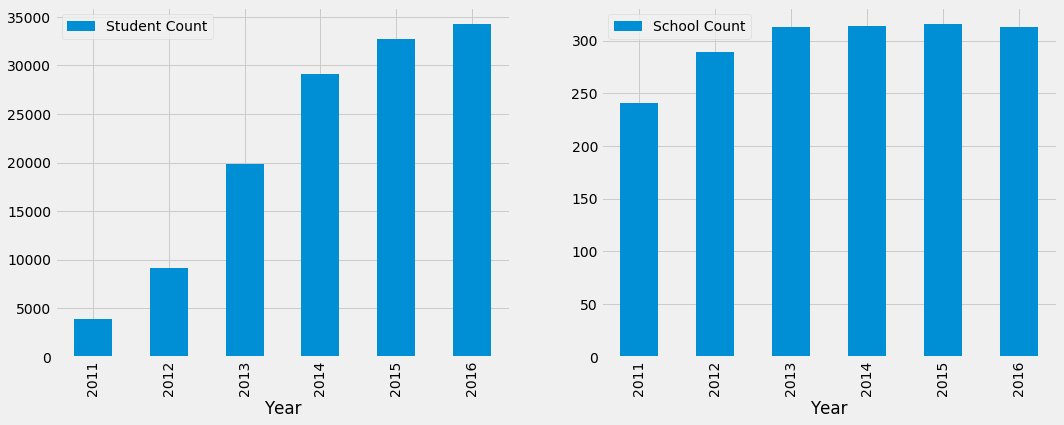

In [731]:
fig, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(16,6), sharex=False, sharey=False)

df_studentParticipation.plot(kind='bar',x='Year',y='Student Count',ax=ax1)
df_schoolParticipation.plot(kind='bar',x='Year',y='School Count',ax=ax2)

In [732]:
df_enrollment

,School Year Start,Traditional Public Num,Traditional Public %,Public Charter Num,Public Charter %,Non-Public (Excluding Choice Students)* Num,Non-Public (Excluding Choice Students)* %,Choice Num,Choice %,Total,Total %
0,2011,1013323,0.9090,28279,0.0250,68686,0.0620,3911,0.0040,1114199,1.0
1,2012,1007529,0.8980,33782,0.0300,71415,0.0640,9139,0.0080,1121865,1.0
2,2013,1011767,0.8950,35678,0.0310,62999,0.0560,19809,0.0180,1130253,1.0
3,2014,1007009,0.8910,38770,0.0340,55385,0.0490,29148,0.0260,1130312,1.0
4,2015,1005254,0.8889,41036,0.0363,51897,0.0459,32686,0.0289,1130873,1.0
5,2016,1004693,0.8864,44444,0.0392,49968,0.0441,34299,0.0303,1133404,1.0


In [733]:
public_school_change = (df_enrollment['Traditional Public Num'][5] - df_enrollment['Traditional Public Num'][0])*-1
choice_school_change = (df_enrollment['Choice Num'][5] - df_enrollment['Choice Num'][0])
non_public_school_change = (df_enrollment['Non-Public (Excluding Choice Students)* Num'][5] - df_enrollment['Non-Public (Excluding Choice Students)* Num'][0])*-1

starting_count = df_studentParticipation['Student Count'][0]
current_count = df_studentParticipation['Student Count'][5]
count_change = current_count - starting_count


print("Since the start of the program, public schools lost %s kids.") %  public_school_change
print("Since the start of the program, non-public schools lost %s kids.") %  non_public_school_change
print("Since the start of the program, choice schools gained %s kids.") %  choice_school_change
print("The school choice program started with %s kids and grew to %s kids in the 2016-17 school year.") % (starting_count, current_count)

Since the start of the program, public schools lost 8630 kids.
Since the start of the program, non-public schools lost 18718 kids.
Since the start of the program, choice schools gained 30388 kids.
The school choice program started with 3911 kids and grew to 34299 kids in the 2016-17 school year.


In [734]:
df_previouslyPublicSchool

,Year,Previously Attended an Indiana Public School,No Record of Attending an Indiana Public School,Total
0,2011,3526,385,3911
1,2012,7223,1916,9139
2,2013,12030,7779,19809
3,2014,14448,14700,29148
4,2015,15574,17112,32686
5,2016,15567,18732,34299


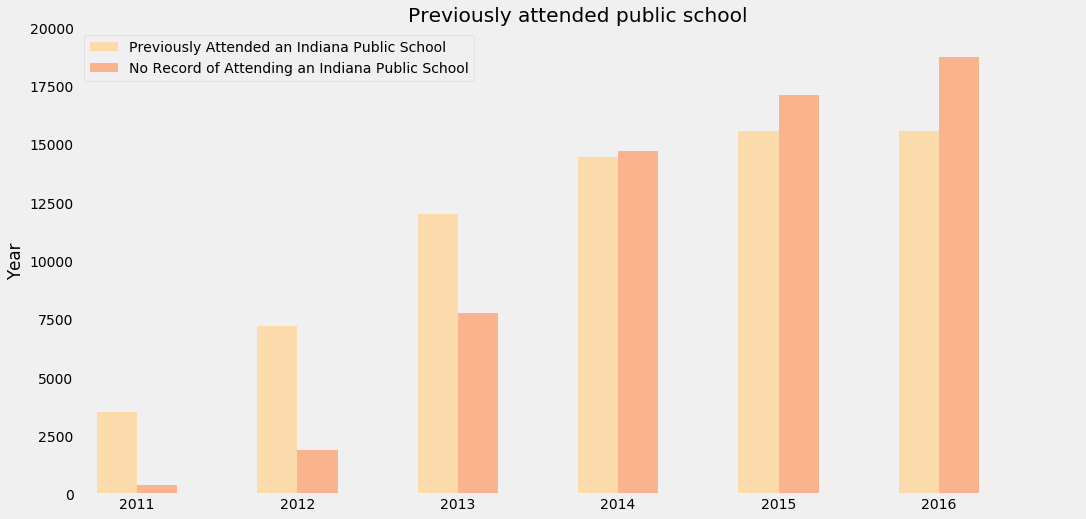

In [735]:
# Setting the positions and width for the bars
pos = list(range(len(df_previouslyPublicSchool['Previously Attended an Indiana Public School'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(16,8))

# Create a bar with previous data
plt.bar(pos, 
        df_previouslyPublicSchool['Previously Attended an Indiana Public School'], 
        width, 
        alpha=0.8, 
        color='#ffd59b', 
        label=df_previouslyPublicSchool['Year'][0])

# Create a bar with no record data
plt.bar([p + width for p in pos], 
        df_previouslyPublicSchool['No Record of Attending an Indiana Public School'], 
        width, 
        alpha=0.8, 
        color='#ffa474', 
        label=df_previouslyPublicSchool['Year'][1])

# Set the y axis label
ax.set_ylabel('Year')

# Set the chart's title
ax.set_title('Previously attended public school')

# Set the position of the x ticks
ax.set_xticks([p + .5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_previouslyPublicSchool['Year'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 20000])

# Adding the legend and showing the plot
plt.legend(['Previously Attended an Indiana Public School', 'No Record of Attending an Indiana Public School'], loc='upper left')
plt.grid()
plt.show()

In [736]:
df_studentPathway
df_studentPathwayWoTotal = df_studentPathway.drop([4,8,9])

In [737]:
df_studentPathwayWoTotal

,Pathway,2013,2013 %,2014,2014 %,2015,2015 %,2016,2016 %
0,Continuing Choice,7066,0.3567,14738,0.5056,22187,0.6788,25020,0.72947
1,Previous Choice,108,0.0054,481,0.0165,603,0.0184,610,0.01778
2,Previous SGO,2423,0.1223,5667,0.1944,2825,0.0864,2330,0.06793
3,Two-Semesters,4599,0.2322,3405,0.1168,3417,0.1045,2828,0.08245
5,Special Education,1088,0.0549,1262,0.0433,1166,0.0357,1140,0.03324
6,F School,1796,0.0907,597,0.0205,251,0.0077,178,0.00519
7,Sibling,2729,0.1378,2998,0.1029,2237,0.0684,2193,0.06394


In [738]:
df_studentPathwayPerc = df_studentPathwayWoTotal.drop(['2013','2014','2015','2016'], axis=1)

In [739]:
df_studentPathwayPerc['2013 %'] = df_studentPathwayPerc['2013 %'].apply(convertPercent)
df_studentPathwayPerc['2014 %'] = df_studentPathwayPerc['2014 %'].apply(convertPercent)
df_studentPathwayPerc['2015 %'] = df_studentPathwayPerc['2015 %'].apply(convertPercent)
df_studentPathwayPerc['2016 %'] = df_studentPathwayPerc['2016 %'].apply(convertPercent)

In [740]:
df_studentPathwayPerc 

,Pathway,2013 %,2014 %,2015 %,2016 %
0,Continuing Choice,35.67,50.56,67.88,72.947
1,Previous Choice,0.54,1.65,1.84,1.778
2,Previous SGO,12.23,19.44,8.64,6.793
3,Two-Semesters,23.22,11.68,10.45,8.245
5,Special Education,5.49,4.33,3.57,3.324
6,F School,9.07,2.05,0.77,0.519
7,Sibling,13.78,10.29,6.84,6.394


In [741]:
df_studentPathwayPercExport = df_studentPathwayPerc.transpose()
df_studentPathwayPercExport.to_csv('school_choice_data/exported_data/df_studentPathwayPerc.csv')
df_studentPathwayPercTransposed = pd.read_csv('school_choice_data/imported_data/df_studentPathwayPerc-transposed.csv')

In [742]:
df_studentPathwayPercTransposed

,Pathway,Continuing Choice,Previous Choice,Previous SGO,Two-Semesters,Special Education,F School,Sibling
0,2013,35.670,0.540,12.230,23.220,5.490,9.070,13.780
1,2014,50.560,1.650,19.440,11.680,4.330,2.050,10.290
2,2015,67.880,1.840,8.640,10.450,3.570,0.770,6.840
3,2016,72.947,1.778,6.793,8.245,3.324,0.519,6.394


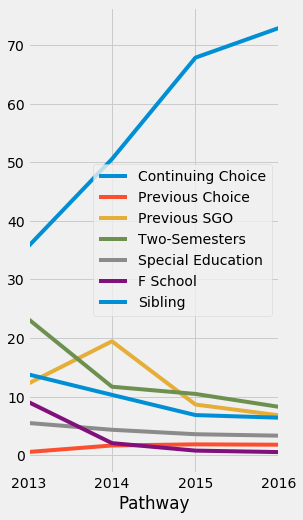

In [743]:
fig, ((ax1)) = plt.subplots(nrows=1, ncols=1, figsize=(4,8), sharex=False, sharey=False)

df_studentPathwayPercTransposed.plot(kind='line',x='Pathway',y='Continuing Choice',ax=ax1)
df_studentPathwayPercTransposed.plot(kind='line',x='Pathway',y='Previous Choice',ax=ax1)
df_studentPathwayPercTransposed.plot(kind='line',x='Pathway',y='Previous SGO',ax=ax1)
df_studentPathwayPercTransposed.plot(kind='line',x='Pathway',y='Two-Semesters',ax=ax1)
df_studentPathwayPercTransposed.plot(kind='line',x='Pathway',y='Special Education',ax=ax1)
df_studentPathwayPercTransposed.plot(kind='line',x='Pathway',y='F School',ax=ax1)
df_studentPathwayPercTransposed.plot(kind='line',x='Pathway',y='Sibling',ax=ax1)



In [744]:
df_studentEthnicity

,Year,American Indian/ Alaskan Native,Black,Asian,Hispanic Ethnicity and of Any Race,White,Multiracial (two or more races),Native Hawaiian or Other Pacific Islander,Total
0,2011,NaN,943,57,794,1814,287,NaN,3911
1,2012,26.0,1855,148,1736,4704,656,14.0,9139
2,2013,48.0,3373,275,3648,11173,1277,15.0,19809
3,2014,54.0,4184,429,4864,17794,1797,26.0,29148
4,2015,44.0,4317,478,5954,19888,1981,24.0,32686
5,2016,55.0,4252,565,6644,20676,2081,26.0,34299


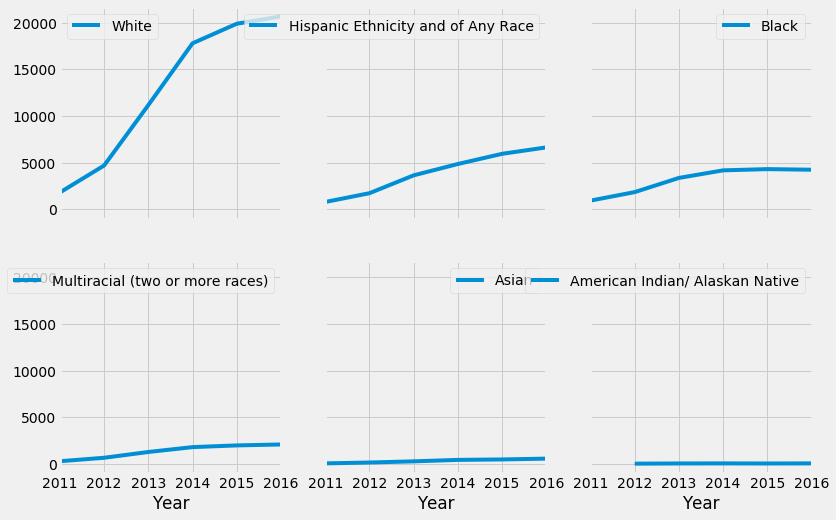

In [745]:
df_studentEthnicity

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(12,8), sharex=True, sharey=True)

df_studentEthnicity.plot(kind='line',x='Year',y='White',ax=ax1)
df_studentEthnicity.plot(kind='line',x='Year',y='Hispanic Ethnicity and of Any Race',ax=ax2)
df_studentEthnicity.plot(kind='line',x='Year',y='Black',ax=ax3)
df_studentEthnicity.plot(kind='line',x='Year',y='Multiracial (two or more races)',ax=ax4)
df_studentEthnicity.plot(kind='line',x='Year',y='Asian',ax=ax5)
df_studentEthnicity.plot(kind='line',x='Year',y='American Indian/ Alaskan Native',ax=ax6)
# df_studentEthnicity.plot(kind='line',x='Year',y='Native Hawaiian or Other Pacific Islander',ax=ax1)



In [746]:
df_studentGender

,Year,Female,Male,Total
0,2011,1988,1923,3911
1,2012,4639,4500,9139
2,2013,9954,9855,19809
3,2014,14669,14479,29148
4,2015,16514,16172,32686
5,2016,17495,16804,34299


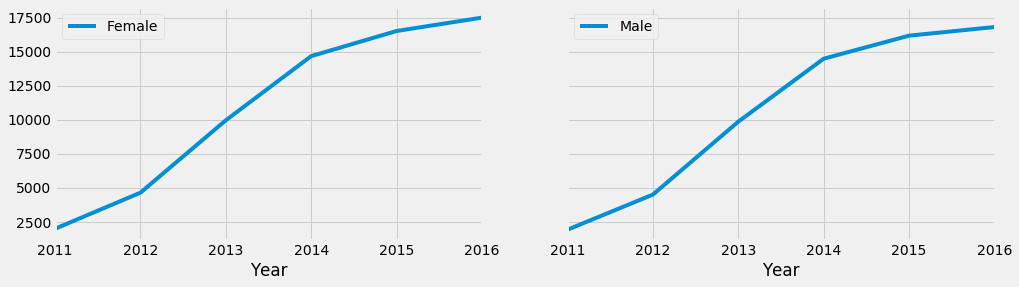

In [747]:
fig, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15,4), sharex=True, sharey=True)

df_studentGender.plot(kind='line',x='Year',y='Female',ax=ax1)
df_studentGender.plot(kind='line',x='Year',y='Male',ax=ax2)

In [748]:
df_studentGeography

,Year,Metropolitan,Suburban,Rural,Town,Total
0,2011,2699,630,299,283,3911
1,2012,6061,1601,772,705,9139
2,2013,13175,3525,1669,1440,19809
3,2014,18213,6259,2522,2154,29148
4,2015,20123,7328,2775,2460,32686
5,2016,20826,7952,2910,2611,34299


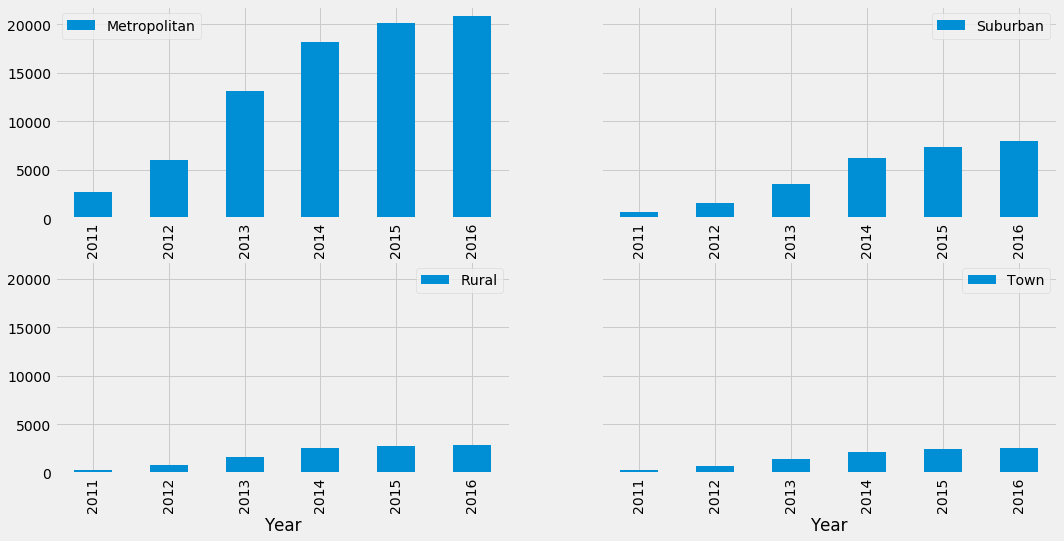

In [749]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,8), sharex=False, sharey=True)

df_studentGeography.plot(kind="bar",x="Year",y="Metropolitan", ax=ax1)
df_studentGeography.plot(kind="bar",x="Year",y="Suburban", ax=ax2)
df_studentGeography.plot(kind="bar",x="Year",y="Rural", ax=ax3)
df_studentGeography.plot(kind="bar",x="Year",y="Town", ax=ax4)

In [750]:
# df_schoolAwardCount
df_schoolAwardAmount

,School No.,School Name,County,2011,2012,2013,2014,2015,2016
0,A260,Aboite Christian School,Huntington,NaN,NaN,NaN,120159.69,166017.44,153605.76
1,C905,Adventist Christian Elementary,Monroe,NaN,NaN,NaN,NaN,36718.10,NaN
2,A515,All Saints Catholic School,Cass,30905.00,79050.40,235478.40,198553.59,NaN,NaN
3,B806,Ambassador Christian Academy,Lake,471628.58,696899.15,1214772.15,991976.45,1003858.37,928125.24
4,C250,Anderson Christian School,Madison,NaN,44841.42,122637.55,107746.74,169825.88,188464.91
5,B760,Andrean High School,Lake,223371.76,330932.78,644151.31,709922.71,866705.25,828258.42
6,B755,Aquinas School at Saint Andrew's,Lake,41082.59,128362.27,184374.49,275155.66,341750.63,342303.34
7,A248,Ascension Lutheran School,Allen,856.00,4577.00,43851.90,112877.61,179773.00,211070.30
8,B764,Avicenna Academy,Lake,NaN,13444.75,52950.00,98091.63,131300.58,107295.75
9,C575,Baptist Academy,Marion,173421.38,358247.06,534973.59,615968.06,533081.67,324602.84


In [751]:
df_schoolAwardAmount.max()
df_schoolAwardCount.max()

School No.                         D907
School Name    Woodburn Lutheran School
County                          Whitley
2011                                110
2012                                156
2013                                257
2014                                361
2015                                422
2016                                450
dtype: object

In [752]:
df_AvgAwardAmt = df_schoolAwardAmount

In [753]:
df_AvgAwardAmt['2011'] = np.vectorize(averageAward)(df_schoolAwardCount['2011'],df_schoolAwardAmount['2011'])
df_AvgAwardAmt['2012'] = np.vectorize(averageAward)(df_schoolAwardCount['2012'],df_schoolAwardAmount['2012'])
df_AvgAwardAmt['2013'] = np.vectorize(averageAward)(df_schoolAwardCount['2013'],df_schoolAwardAmount['2013'])
df_AvgAwardAmt['2014'] = np.vectorize(averageAward)(df_schoolAwardCount['2014'],df_schoolAwardAmount['2014'])
df_AvgAwardAmt['2015'] = np.vectorize(averageAward)(df_schoolAwardCount['2015'],df_schoolAwardAmount['2015'])
df_AvgAwardAmt['2016'] = np.vectorize(averageAward)(df_schoolAwardCount['2016'],df_schoolAwardAmount['2016'])

In [754]:
df_AvgAwardAmt.to_csv('school_choice_data/exported_data/df_AvgAwardAmt.csv')

In [755]:
df_AvgAwardAmt.max()

School No.                         D907
School Name    Woodburn Lutheran School
County                          Whitley
2011                            5890.14
2012                            6031.11
2013                            6313.58
2014                            6056.24
2015                            6011.87
2016                            6455.32
dtype: object

In [756]:
# df_schoolAwardCount

In [757]:
df_AvgAwardAmt_sorted = df_AvgAwardAmt.sort_values('School No.')

In [758]:
df_CountySchoolsCount = pd.value_counts(df_AvgAwardAmt_sorted['County'].values)

In [759]:
# df_CountySchoolsCount

In [760]:
df_schoolsCountAmount = df_schoolAwardCount.merge(df_schoolAwardAmount,on='School No.',how='outer').drop(['School Name_y', 'County_y'], axis=1)
df_schoolsCountAmount = df_schoolsCountAmount.rename(columns = {'School Name_x':'School Name','County_x':'County','2011_x':'2011 Count','2012_x':'2012 Count','2013_x':'2013 Count','2014_x':'2014 Count','2015_x':'2015 Count','2016_x':'2016 Count','2011_y':'2011 Avg Amount','2012_y':'2012 Avg Amount','2013_y':'2013 Avg Amount','2014_y':'2014 Avg Amount','2015_y':'2015 Avg Amount','2016_y':'2016 Avg Amount'})
df_schoolsCountAmountCols = df_schoolsCountAmount.columns.tolist()
df_schoolsCountAmountCols = ['School No.',
                             'School Name',
                             'County',
                             '2011 Count',
                             '2011 Avg Amount',
                             '2012 Count',
                             '2012 Avg Amount',
                             '2013 Count',
                             '2013 Avg Amount',
                             '2014 Count',
                             '2014 Avg Amount',
                             '2015 Count',
                             '2015 Avg Amount',
                             '2016 Count',
                             '2016 Avg Amount']
df_schoolsCountAmount = df_schoolsCountAmount[df_schoolsCountAmountCols]

In [761]:
# df_schoolsCountAmount

In [762]:
df_schoolsCountAmountClean = df_schoolsCountAmount

df_schoolsCountAmountClean['2011 Count'] = df_schoolsCountAmount['2011 Count'].apply(convertInt)
df_schoolsCountAmountClean['2012 Count'] = df_schoolsCountAmount['2012 Count'].apply(convertInt)
df_schoolsCountAmountClean['2013 Count'] = df_schoolsCountAmount['2013 Count'].apply(convertInt)
df_schoolsCountAmountClean['2014 Count'] = df_schoolsCountAmount['2014 Count'].apply(convertInt)
df_schoolsCountAmountClean['2015 Count'] = df_schoolsCountAmount['2015 Count'].apply(convertInt)
df_schoolsCountAmountClean['2016 Count'] = df_schoolsCountAmount['2016 Count'].apply(convertInt)

In [763]:
print('the zeros do not always indicate that no students were in the program.')
print('schools with less than ten students do not have to report')
# df_schoolsCountAmountClean


the zeros do not always indicate that no students were in the program.
schools with less than ten students do not have to report


In [764]:
df_schoolsCountAmountClean.sort_values('2016 Count', ascending=False)
# df_schoolsCountAmountClean

,School No.,School Name,County,2011 Count,2011 Avg Amount,2012 Count,2012 Avg Amount,2013 Count,2013 Avg Amount,2014 Count,2014 Avg Amount,2015 Count,2015 Avg Amount,2016 Count,2016 Avg Amount
13,A120,Bishop Dwenger High School,Allen,22,4766.02,43,4942.92,145,4738.59,344,4509.70,422,4324.97,450,4443.09
106,A307,Horizon Christian Academy III,Allen,0,None,17,4415.31,186,4630.61,191,4696.40,236,4854.57,433,5629.30
45,A195,Concordia Lutheran High School,Allen,21,4842.74,45,5080.4,87,5068.66,292,4668.78,366,4455.73,397,4599.87
14,A125,Bishop Luers High School,Allen,58,4824.79,109,5274.51,200,5364.83,303,5065.63,343,4742.79,391,4822.37
196,A145,Saint Charles Borromeo School,Allen,24,3930.98,91,4097.52,233,4180.32,361,3667.56,408,3762.78,389,4041.83
175,C320,Roncalli High School,Marion,22,4392.87,51,4357.19,119,4861.94,279,4631.97,347,4417.41,342,4541.46
132,D165,Marian High School,St Joseph,41,5463.6,65,5177.23,140,5368.69,290,4719.35,329,4729.51,341,4748.27
67,D485,Evansville Christian School,Vanderburgh,10,4489.83,53,4079.34,167,4136.84,271,4152.08,294,4340.09,330,4554.41
194,B950,Saint Casimir School,Lake,35,3885.57,91,3811.06,202,3820.88,287,4020.23,308,4024.93,330,4074.57
24,C715,Cardinal Ritter High School,Marion,61,5177.25,111,5106.11,211,5358.78,252,5041.07,298,4874.06,330,5226.88


In [765]:
df_schoolRatings = pd.read_csv('school_choice_data/imported_data/final-2016-af-school-grades.csv')
df_schoolRatings

,IDOE_CORPORATION_ID,CORPORATION_NAME,IDOE_SCHOOL_ID,SCHOOL_NAME,2016 Grade
0,9200,Archdiocese of Indianapolis,A425,St Bartholomew School,A
1,9200,Archdiocese of Indianapolis,A550,St John Paul II Catholic School,B
2,9200,Archdiocese of Indianapolis,A560,Saint Anthony School,A
3,9200,Archdiocese of Indianapolis,A570,Sacred Heart School,A
4,9200,Archdiocese of Indianapolis,A575,Our Lady Of Providence High School,A
5,9200,Archdiocese of Indianapolis,A680,Saint Nicholas School,A
6,9200,Archdiocese of Indianapolis,A685,Saint Paul Catholic School,C
7,9200,Archdiocese of Indianapolis,A690,Saint Mary School,B
8,9200,Archdiocese of Indianapolis,A700,Saint Lawrence School,C
9,9200,Archdiocese of Indianapolis,A730,Saint Mary School,A


In [766]:
# df_schoolStudent = df_schoolAwardCount.merge(df_schoolAwardAmount,on='School No.',how='outer').drop(['School Name_y', 'County_y'], axis=1)
df_schoolRatingsCond = df_schoolRatings.drop(['IDOE_CORPORATION_ID','CORPORATION_NAME'], axis=1)
df_schoolRatingsCond = df_schoolRatingsCond.rename(columns = {'IDOE_SCHOOL_ID':'School No.','SCHOOL_NAME':'School Name','2016 Grade':'2016_grade'})

df_schoolRatingsCond


,School No.,School Name,2016_grade
0,A425,St Bartholomew School,A
1,A550,St John Paul II Catholic School,B
2,A560,Saint Anthony School,A
3,A570,Sacred Heart School,A
4,A575,Our Lady Of Providence High School,A
5,A680,Saint Nicholas School,A
6,A685,Saint Paul Catholic School,C
7,A690,Saint Mary School,B
8,A700,Saint Lawrence School,C
9,A730,Saint Mary School,A


In [767]:
df_schoolAwardsReworked = pd.read_csv('school_choice_data/imported_data/awards_by_school_16_reworked.csv')
df_schoolAwardsReworked

df_schoolAwardsWithNull = df_schoolAwardsReworked
df_schoolAwardsWithNull['2011'] = df_schoolAwardsWithNull['2011'].apply(fillNone)
df_schoolAwardsWithNull['2012'] = df_schoolAwardsWithNull['2012'].apply(fillNone)
df_schoolAwardsWithNull['2013'] = df_schoolAwardsWithNull['2013'].apply(fillNone)
df_schoolAwardsWithNull['2014'] = df_schoolAwardsWithNull['2014'].apply(fillNone)
df_schoolAwardsWithNull['2015'] = df_schoolAwardsWithNull['2015'].apply(fillNone)
df_schoolAwardsWithNull['2016'] = df_schoolAwardsWithNull['2016'].apply(fillNone)
df_schoolAwardsWithNull

,School No.,School Name,County,2011,2012,2013,2014,2015,2016
0,A260,Aboite Christian School,Huntington,9.0,9.0,NaN,27.0,36.0,35.0
1,C905,Adventist Christian Elementary,Monroe,9.0,9.0,9.0,NaN,10.0,NaN
2,A515,All Saints Catholic School,Cass,NaN,19.0,55.0,68.0,9.0,9.0
3,B806,Ambassador Christian Academy,Lake,110.0,156.0,257.0,206.0,210.0,154.0
4,C250,Anderson Christian School,Madison,9.0,12.0,30.0,24.0,37.0,40.0
5,B760,Andrean High School,Lake,41.0,61.0,114.0,134.0,174.0,161.0
6,B755,Aquinas School at Saint Andrew's,Lake,11.0,31.0,43.0,64.0,78.0,79.0
7,A248,Ascension Lutheran School,Allen,NaN,NaN,32.0,66.0,78.0,86.0
8,B764,Avicenna Academy,Lake,9.0,NaN,11.0,22.0,29.0,20.0
9,C575,Baptist Academy,Marion,41.0,82.0,126.0,139.0,105.0,65.0


In [768]:
df_schoolsPercChange = df_schoolAwardsReworked
df_schoolsPercChange['percent_change'] = np.vectorize(percentChange)(df_schoolAwardsReworked['2011'],df_schoolAwardsReworked['2016'])
df_schoolsPercChange

df_schoolAwardsPercChange = df_schoolAwardsWithNull
df_schoolAwardsPercChange['percent_change'] = np.vectorize(percentChange)(df_schoolAwardsPercChange['2011'],df_schoolAwardsPercChange['2016'])
df_schoolAwardsPercChange

,School No.,School Name,County,2011,2012,2013,2014,2015,2016,percent_change
0,A260,Aboite Christian School,Huntington,9.0,9.0,NaN,27.0,36.0,35.0,2.888889
1,C905,Adventist Christian Elementary,Monroe,9.0,9.0,9.0,NaN,10.0,NaN,NaN
2,A515,All Saints Catholic School,Cass,NaN,19.0,55.0,68.0,9.0,9.0,NaN
3,B806,Ambassador Christian Academy,Lake,110.0,156.0,257.0,206.0,210.0,154.0,0.400000
4,C250,Anderson Christian School,Madison,9.0,12.0,30.0,24.0,37.0,40.0,3.444444
5,B760,Andrean High School,Lake,41.0,61.0,114.0,134.0,174.0,161.0,2.926829
6,B755,Aquinas School at Saint Andrew's,Lake,11.0,31.0,43.0,64.0,78.0,79.0,6.181818
7,A248,Ascension Lutheran School,Allen,NaN,NaN,32.0,66.0,78.0,86.0,NaN
8,B764,Avicenna Academy,Lake,9.0,NaN,11.0,22.0,29.0,20.0,1.222222
9,C575,Baptist Academy,Marion,41.0,82.0,126.0,139.0,105.0,65.0,0.585366


In [769]:
df_schoolsChangeGrade = df_schoolRatingsCond.merge(df_schoolAwardsPercChange,on='School No.', how='outer').drop(['2012','2013','2014','2015'], axis=1)
df_schoolsChangeGrade['School Name'] = np.vectorize(fillInfo)(df_schoolsChangeGrade['School Name_y'],df_schoolsChangeGrade['School Name_x'])
df_schoolsChangeGrade

,School No.,School Name_x,2016_grade,School Name_y,County,2011,2016,percent_change,School Name
0,A425,St Bartholomew School,A,Saint Bartholomew School,Bartholomew,9.0,122.0,12.555556,Saint Bartholomew School
1,A550,St John Paul II Catholic School,B,Saint Paul School,Clark,9.0,49.0,4.444444,Saint Paul School
2,A560,Saint Anthony School,A,Saint Anthony School,Clark,10.0,179.0,16.900000,Saint Anthony School
3,A570,Sacred Heart School,A,Sacred Heart School,Clark,18.0,99.0,4.500000,Sacred Heart School
4,A575,Our Lady Of Providence High School,A,Our Lady Of Providence High School,Clark,NaN,107.0,NaN,Our Lady Of Providence High School
5,A680,Saint Nicholas School,A,Saint Nicholas School,Ripley,NaN,NaN,NaN,Saint Nicholas School
6,A685,Saint Paul Catholic School,C,Saint Paul Catholic School,Dearborn,9.0,43.0,3.777778,Saint Paul Catholic School
7,A690,Saint Mary School,B,Saint Mary School,Dearborn,NaN,53.0,NaN,Saint Mary School
8,A700,Saint Lawrence School,C,Saint Lawrence School,Dearborn,9.0,37.0,3.111111,Saint Lawrence School
9,A730,Saint Mary School,A,Saint Mary School,Decatur,9.0,23.0,1.555556,Saint Mary School


In [770]:
df_schoolsChangeGrade = df_schoolsChangeGrade.drop(['School Name_x','School Name_y'], axis=1)
cols = list(df_schoolsChangeGrade)
df_schoolsChangeGrade = df_schoolsChangeGrade.rename(columns = {'percent_change':'Count % Change','2016_grade':'Grade', '2011':'SC 2011', '2016':'SC 2016'})
cols = ['School No.','School Name','County','Grade','SC 2011','SC 2016','Count % Change']
df_schoolsChangeGrade = df_schoolsChangeGrade[cols]
df_schoolsChangeGrade.sort_values('School Name').to_csv('school_choice_data/exported_data/df_schoolsChangeGrade.csv')

In [771]:
df_schoolsChangeGrade

,School No.,School Name,County,Grade,SC 2011,SC 2016,Count % Change
0,A425,Saint Bartholomew School,Bartholomew,A,9.0,122.0,12.555556
1,A550,Saint Paul School,Clark,B,9.0,49.0,4.444444
2,A560,Saint Anthony School,Clark,A,10.0,179.0,16.900000
3,A570,Sacred Heart School,Clark,A,18.0,99.0,4.500000
4,A575,Our Lady Of Providence High School,Clark,A,NaN,107.0,NaN
5,A680,Saint Nicholas School,Ripley,A,NaN,NaN,NaN
6,A685,Saint Paul Catholic School,Dearborn,C,9.0,43.0,3.777778
7,A690,Saint Mary School,Dearborn,B,NaN,53.0,NaN
8,A700,Saint Lawrence School,Dearborn,C,9.0,37.0,3.111111
9,A730,Saint Mary School,Decatur,A,9.0,23.0,1.555556


### Cleaning: df_schoolSpecEdEnrollment

In [772]:
def filterPrivate(id):
    if pd.isnull(id):
        return True
    else:
        try:
            float(id)
        except ValueError:
            return False
        return True

df_schoolSpecEdEnrollmentAll_filtered = df_schoolSpecEdEnrollmentALL
df_schoolSpecEdEnrollmentAll_filtered['filter'] = df_schoolSpecEdEnrollmentALL['SCHL_NAME_CODE'].apply(filterPrivate)
df_schoolSpecEdEnrollmentAll_filtered = df_schoolSpecEdEnrollmentAll_filtered[df_schoolSpecEdEnrollmentAll_filtered['filter'] == False]
df_schoolSpecEdEnrollmentAll_filtered = df_schoolSpecEdEnrollmentAll_filtered.reset_index()
df_schoolSpecEdEnrollmentAll_filtered

,index,CORP,CORP_NAME,SCHL_NAME_CODE,SCHL_NAME,ENR_ELL_N,ENR_ELL_RATIO,ENR_SPEC_ED_N,ENR_SPEC_ED_RATIO,ENROLLMENT_N,filter
0,2083,9200,Archdiocese of Indianapolis,A425,St Bartholomew School,43,11.50%,19,5.08%,374,False
1,2084,9200,Archdiocese of Indianapolis,A550,St John Paul II Catholic School,2,0.61%,30,9.09%,330,False
2,2085,9200,Archdiocese of Indianapolis,A560,Saint Anthony of Padua,21,6.27%,41,12.24%,335,False
3,2086,9200,Archdiocese of Indianapolis,A570,Sacred Heart School,0,0.00%,22,12.09%,182,False
4,2087,9200,Archdiocese of Indianapolis,A575,Our Lady Of Providence High School,2,0.41%,34,6.95%,489,False
5,2088,9200,Archdiocese of Indianapolis,A680,Saint Nicholas School,0,0.00%,6,5.56%,108,False
6,2089,9200,Archdiocese of Indianapolis,A685,All Saints Catholic Academy,0,0.00%,10,16.13%,62,False
7,2090,9200,Archdiocese of Indianapolis,A690,Saint Mary School,0,0.00%,12,10.91%,110,False
8,2091,9200,Archdiocese of Indianapolis,A700,Saint Lawrence School,0,0.00%,12,5.80%,207,False
9,2092,9200,Archdiocese of Indianapolis,A730,Saint Mary's School,0,0.00%,26,10.24%,254,False


In [773]:
# copy df_schoolSpecEdEnrollment dataframe
df_schoolSpecEdCorpEnrollment = df_schoolSpecEdEnrollment
df_schoolSpecEdSchoolEnrollment = df_schoolSpecEdEnrollment
# df_schoolSpecEdEnrollmentALL 

# fill corp with zeros
df_schoolSpecEdCorpEnrollment = df_schoolSpecEdEnrollment.fillna(0)

# filter for zeros
df_schoolSpecEdSchoolEnrollment = df_schoolSpecEdCorpEnrollment[df_schoolSpecEdCorpEnrollment['SCHL_NAME_CODE'] != 0]
df_schoolSpecEdCorpEnrollment = df_schoolSpecEdCorpEnrollment[df_schoolSpecEdCorpEnrollment['SCHL_NAME_CODE'] == 0]

# drop ell columns
df_schoolSpecEdCorpEnrollment = df_schoolSpecEdCorpEnrollment.drop(['SCHL_NAME_CODE','SCHL_NAME','ENR_ELL_N','ENR_ELL_RATIO'], axis=1)
df_schoolSpecEdSchoolEnrollment = df_schoolSpecEdSchoolEnrollment.drop(['ENR_ELL_N','ENR_ELL_RATIO'], axis=1)

In [774]:
# df_schoolSpecEdCorpEnrollment
df_schoolSpecEdSchoolEnrollment = df_schoolSpecEdSchoolEnrollment.rename(columns ={'SCHL_NAME_CODE':'School No.'})
df_schoolSpecEdSchoolEnrollment

,CORP,CORP_NAME,School No.,SCHL_NAME,ENR_SPEC_ED_N,ENR_SPEC_ED_RATIO,ENROLLMENT_N
1,9200,Archdiocese of Indianapolis,A425,St Bartholomew School,19,5.08%,374
2,9200,Archdiocese of Indianapolis,A550,St John Paul II Catholic School,30,9.09%,330
3,9200,Archdiocese of Indianapolis,A560,Saint Anthony of Padua,41,12.24%,335
4,9200,Archdiocese of Indianapolis,A570,Sacred Heart School,22,12.09%,182
5,9200,Archdiocese of Indianapolis,A575,Our Lady Of Providence High School,34,6.95%,489
6,9200,Archdiocese of Indianapolis,A680,Saint Nicholas School,6,5.56%,108
7,9200,Archdiocese of Indianapolis,A685,All Saints Catholic Academy,10,16.13%,62
8,9200,Archdiocese of Indianapolis,A690,Saint Mary School,12,10.91%,110
9,9200,Archdiocese of Indianapolis,A700,Saint Lawrence School,12,5.80%,207
10,9200,Archdiocese of Indianapolis,A730,Saint Mary's School,26,10.24%,254


In [775]:
df_schoolEnrollmentCond = df_schoolEnrollment.drop(['GRADE', 'ENROLLMENT_N'], axis=1)
df_schoolEnrollmentCond = df_schoolEnrollmentCond.drop_duplicates().reset_index()
df_schoolEnrollmentCond

,index,CORP_NAME_CODE1,CORP_NAME1,SCHL_NAME_CODE,SCHL_NAME,ENROLLMENT_N1
0,0,9200,Archdiocese of Indianapolis,A425,St Bartholomew School,374
1,15,9200,Archdiocese of Indianapolis,A550,St John Paul II Catholic School,330
2,30,9200,Archdiocese of Indianapolis,A560,Saint Anthony of Padua,335
3,45,9200,Archdiocese of Indianapolis,A570,Sacred Heart School,182
4,60,9200,Archdiocese of Indianapolis,A575,Our Lady Of Providence High School,489
5,75,9200,Archdiocese of Indianapolis,A680,Saint Nicholas School,108
6,90,9200,Archdiocese of Indianapolis,A685,All Saints Catholic Academy,62
7,105,9200,Archdiocese of Indianapolis,A690,Saint Mary School,110
8,120,9200,Archdiocese of Indianapolis,A700,Saint Lawrence School,207
9,135,9200,Archdiocese of Indianapolis,A730,Saint Mary's School,254


In [776]:
# df_schoolsChangeGradeClean = df_schoolsChangeGrade
# df_schoolsChangeGradeClean['Discard'] = pd.isnull(df_schoolsChangeGradeClean['School Name'])
# df_schoolsChangeGradeClean = df_schoolsChangeGradeClean[df_schoolsChangeGradeClean['Discard'] == True]
# df_schoolsChangeGradeClean = df_schoolsChangeGradeClean.drop('Discard', axis=1)
# df_schoolsChangeGradeClean 

In [777]:
df_schoolsChangeGradeMerged = df_schoolsChangeGrade
df_schoolsChangeGradeMerged = df_schoolsChangeGradeMerged.merge(df_schoolSpecEdSchoolEnrollment,on='School No.', how='outer').drop(['SCHL_NAME'], axis=1)

In [778]:
df_schoolsChangeGradeMerged = df_schoolsChangeGradeMerged.rename(columns = {'School No.':'School ID','CORP':'Corp ID','CORP_NAME':'Corp Name','ENR_SPEC_ED_N':'SpecEd 2016','ENR_SPEC_ED_RATIO':'SpecEd Perc','ENROLLMENT_N':'Enrollment 2016'})
df_schoolsChangeGradeMerged.to_csv('school_choice_data/exported_data/enrollment_wSpecEd.csv')
df_schoolsChangeGradeMerged

,School ID,School Name,County,Grade,SC 2011,SC 2016,Count % Change,Corp ID,Corp Name,SpecEd 2016,SpecEd Perc,Enrollment 2016
0,A425,Saint Bartholomew School,Bartholomew,A,9.0,122.0,12.555556,9200.0,Archdiocese of Indianapolis,19.0,5.08%,374.0
1,A550,Saint Paul School,Clark,B,9.0,49.0,4.444444,9200.0,Archdiocese of Indianapolis,30.0,9.09%,330.0
2,A560,Saint Anthony School,Clark,A,10.0,179.0,16.900000,9200.0,Archdiocese of Indianapolis,41.0,12.24%,335.0
3,A570,Sacred Heart School,Clark,A,18.0,99.0,4.500000,9200.0,Archdiocese of Indianapolis,22.0,12.09%,182.0
4,A575,Our Lady Of Providence High School,Clark,A,NaN,107.0,NaN,9200.0,Archdiocese of Indianapolis,34.0,6.95%,489.0
5,A680,Saint Nicholas School,Ripley,A,NaN,NaN,NaN,9200.0,Archdiocese of Indianapolis,6.0,5.56%,108.0
6,A685,Saint Paul Catholic School,Dearborn,C,9.0,43.0,3.777778,9200.0,Archdiocese of Indianapolis,10.0,16.13%,62.0
7,A690,Saint Mary School,Dearborn,B,NaN,53.0,NaN,9200.0,Archdiocese of Indianapolis,12.0,10.91%,110.0
8,A700,Saint Lawrence School,Dearborn,C,9.0,37.0,3.111111,9200.0,Archdiocese of Indianapolis,12.0,5.80%,207.0
9,A730,Saint Mary School,Decatur,A,9.0,23.0,1.555556,9200.0,Archdiocese of Indianapolis,26.0,10.24%,254.0


In [779]:
# HEREEEEEE
df_updatedEnrollment = pd.read_csv('school_choice_data/imported_data/updatedEnrollment.csv')
df_updatedEnrollment.sort_values('School ID')

,School ID,SpecEd 2016,SpecEd Perc,Enrollment 2016
13,A170,5.0,1.43%,350.0
12,A172,12.0,3.06%,392.0
58,A236,1.0,0.77%,130.0
55,A249,11.0,7.48%,147.0
93,A260,0.0,0.00%,45.0
92,A275,35.0,74.47%,47.0
124,A302,NaN,NaN,NaN
10,A307,60.0,12.20%,492.0
123,A309,NaN,NaN,NaN
114,A352,0.0,0.00%,4.0


In [780]:
df_schoolsGradeEnrollmentUpd = df_schoolsChangeGradeMerged.merge(df_updatedEnrollment, on='School ID', how='outer')
df_schoolsGradeEnrollmentUpd

,School ID,School Name,County,Grade,SC 2011,SC 2016,Count % Change,Corp ID,Corp Name,SpecEd 2016_x,SpecEd Perc_x,Enrollment 2016_x,SpecEd 2016_y,SpecEd Perc_y,Enrollment 2016_y
0,A425,Saint Bartholomew School,Bartholomew,A,9.0,122.0,12.555556,9200.0,Archdiocese of Indianapolis,19.0,5.08%,374.0,NaN,NaN,NaN
1,A550,Saint Paul School,Clark,B,9.0,49.0,4.444444,9200.0,Archdiocese of Indianapolis,30.0,9.09%,330.0,NaN,NaN,NaN
2,A560,Saint Anthony School,Clark,A,10.0,179.0,16.900000,9200.0,Archdiocese of Indianapolis,41.0,12.24%,335.0,NaN,NaN,NaN
3,A570,Sacred Heart School,Clark,A,18.0,99.0,4.500000,9200.0,Archdiocese of Indianapolis,22.0,12.09%,182.0,NaN,NaN,NaN
4,A575,Our Lady Of Providence High School,Clark,A,NaN,107.0,NaN,9200.0,Archdiocese of Indianapolis,34.0,6.95%,489.0,NaN,NaN,NaN
5,A680,Saint Nicholas School,Ripley,A,NaN,NaN,NaN,9200.0,Archdiocese of Indianapolis,6.0,5.56%,108.0,NaN,NaN,NaN
6,A685,Saint Paul Catholic School,Dearborn,C,9.0,43.0,3.777778,9200.0,Archdiocese of Indianapolis,10.0,16.13%,62.0,NaN,NaN,NaN
7,A690,Saint Mary School,Dearborn,B,NaN,53.0,NaN,9200.0,Archdiocese of Indianapolis,12.0,10.91%,110.0,NaN,NaN,NaN
8,A700,Saint Lawrence School,Dearborn,C,9.0,37.0,3.111111,9200.0,Archdiocese of Indianapolis,12.0,5.80%,207.0,NaN,NaN,NaN
9,A730,Saint Mary School,Decatur,A,9.0,23.0,1.555556,9200.0,Archdiocese of Indianapolis,26.0,10.24%,254.0,NaN,NaN,NaN


In [781]:
df_schoolsGradeEnrollmentUpd['SpecEd 2016'] = np.vectorize(fillInfo)(df_schoolsGradeEnrollmentUpd['SpecEd 2016_x'],df_schoolsGradeEnrollmentUpd['SpecEd 2016_y'])
df_schoolsGradeEnrollmentUpd['SpecEd Perc'] = np.vectorize(fillInfo)(df_schoolsGradeEnrollmentUpd['SpecEd Perc_x'],df_schoolsGradeEnrollmentUpd['SpecEd Perc_y'])
df_schoolsGradeEnrollmentUpd['Enrollment 2016'] = np.vectorize(fillInfo)(df_schoolsGradeEnrollmentUpd['Enrollment 2016_x'],df_schoolsGradeEnrollmentUpd['Enrollment 2016_y'])
df_schoolsGradeEnrollmentUpd = df_schoolsGradeEnrollmentUpd.drop(['SpecEd 2016_x','SpecEd Perc_x','Enrollment 2016_x','SpecEd 2016_y','SpecEd Perc_y','Enrollment 2016_y'], axis=1)

In [782]:
df_schoolsGradeEnrollmentUpd['SpecEd Perc'] = df_schoolsGradeEnrollmentUpd['SpecEd Perc'].apply(normalizePerc)
df_schoolsGradeEnrollmentUpd

,School ID,School Name,County,Grade,SC 2011,SC 2016,Count % Change,Corp ID,Corp Name,SpecEd 2016,SpecEd Perc,Enrollment 2016
0,A425,Saint Bartholomew School,Bartholomew,A,9.0,122.0,12.555556,9200.0,Archdiocese of Indianapolis,19.0,5.08,374.0
1,A550,Saint Paul School,Clark,B,9.0,49.0,4.444444,9200.0,Archdiocese of Indianapolis,30.0,9.09,330.0
2,A560,Saint Anthony School,Clark,A,10.0,179.0,16.900000,9200.0,Archdiocese of Indianapolis,41.0,12.24,335.0
3,A570,Sacred Heart School,Clark,A,18.0,99.0,4.500000,9200.0,Archdiocese of Indianapolis,22.0,12.09,182.0
4,A575,Our Lady Of Providence High School,Clark,A,NaN,107.0,NaN,9200.0,Archdiocese of Indianapolis,34.0,6.95,489.0
5,A680,Saint Nicholas School,Ripley,A,NaN,NaN,NaN,9200.0,Archdiocese of Indianapolis,6.0,5.56,108.0
6,A685,Saint Paul Catholic School,Dearborn,C,9.0,43.0,3.777778,9200.0,Archdiocese of Indianapolis,10.0,16.13,62.0
7,A690,Saint Mary School,Dearborn,B,NaN,53.0,NaN,9200.0,Archdiocese of Indianapolis,12.0,10.91,110.0
8,A700,Saint Lawrence School,Dearborn,C,9.0,37.0,3.111111,9200.0,Archdiocese of Indianapolis,12.0,5.80,207.0
9,A730,Saint Mary School,Decatur,A,9.0,23.0,1.555556,9200.0,Archdiocese of Indianapolis,26.0,10.24,254.0


In [783]:
df_schoolsGradeEnrollmentUpd['Voucher Perc'] = np.vectorize(calcPerc)(df_schoolsGradeEnrollmentUpd['SC 2016'],df_schoolsGradeEnrollmentUpd['Enrollment 2016'])
cols = ['Corp ID','Corp Name','School ID','School Name','County','Grade','SC 2011','SC 2016','Count % Change','SpecEd 2016','SpecEd Perc','Enrollment 2016','Voucher Perc']
df_schoolsGradeEnrollmentUpd = df_schoolsGradeEnrollmentUpd[cols]
df_schoolsGradeEnrollmentUpd.to_csv('school_choice_data/exported_data/schoolsGradeEnrollmentUpd.csv')
df_schoolsGradeEnrollmentUpd

,Corp ID,Corp Name,School ID,School Name,County,Grade,SC 2011,SC 2016,Count % Change,SpecEd 2016,SpecEd Perc,Enrollment 2016,Voucher Perc
0,9200.0,Archdiocese of Indianapolis,A425,Saint Bartholomew School,Bartholomew,A,9.0,122.0,12.555556,19.0,5.08,374.0,32.62
1,9200.0,Archdiocese of Indianapolis,A550,Saint Paul School,Clark,B,9.0,49.0,4.444444,30.0,9.09,330.0,14.85
2,9200.0,Archdiocese of Indianapolis,A560,Saint Anthony School,Clark,A,10.0,179.0,16.900000,41.0,12.24,335.0,53.43
3,9200.0,Archdiocese of Indianapolis,A570,Sacred Heart School,Clark,A,18.0,99.0,4.500000,22.0,12.09,182.0,54.40
4,9200.0,Archdiocese of Indianapolis,A575,Our Lady Of Providence High School,Clark,A,NaN,107.0,NaN,34.0,6.95,489.0,21.88
5,9200.0,Archdiocese of Indianapolis,A680,Saint Nicholas School,Ripley,A,NaN,NaN,NaN,6.0,5.56,108.0,NaN
6,9200.0,Archdiocese of Indianapolis,A685,Saint Paul Catholic School,Dearborn,C,9.0,43.0,3.777778,10.0,16.13,62.0,69.35
7,9200.0,Archdiocese of Indianapolis,A690,Saint Mary School,Dearborn,B,NaN,53.0,NaN,12.0,10.91,110.0,48.18
8,9200.0,Archdiocese of Indianapolis,A700,Saint Lawrence School,Dearborn,C,9.0,37.0,3.111111,12.0,5.80,207.0,17.87
9,9200.0,Archdiocese of Indianapolis,A730,Saint Mary School,Decatur,A,9.0,23.0,1.555556,26.0,10.24,254.0,9.06


In [784]:
df_vouchersByOgSchoolDistrict = df_vouchersByOgSchoolDistrict.drop(['Voucher students from this district (2016-2017)'], axis=1)

In [785]:
df_vouchersByOgSchoolDistrict

,Corp. No.,Corporation Name,School No.,School Name
0,15,Adams Central Community Schools,A035,Saint Joseph School
1,5265,Alexandria Community School Corporation,C175,Indiana Christian Academy
2,5265,Alexandria Community School Corporation,B145,Lakeview Christian School
3,5265,Alexandria Community School Corporation,C226,Liberty Christian Elementary
4,5265,Alexandria Community School Corporation,C225,Liberty Christian School
5,5265,Alexandria Community School Corporation,A795,Saint Mary School
6,5265,Alexandria Community School Corporation,C190,Saint Mary School
7,5275,Anderson Community School Corporation,C250,Anderson Christian School
8,5275,Anderson Community School Corporation,C700,Cathedral High School
9,5275,Anderson Community School Corporation,C215,Cross Street Christian School


In [786]:
df_vouchersByOgSchoolDistrict = df_vouchersByOgSchoolDistrict.rename(columns = {'School No.':'School ID'})

In [787]:
df_schoolGradeEnrDist = df_schoolsGradeEnrollmentUpd.merge(df_vouchersByOgSchoolDistrict, on='School ID', how='outer')
df_schoolGradeEnrDist = df_schoolGradeEnrDist.drop(['Grade','SC 2011','Count % Change','Voucher Perc','School Name_y'], axis=1).rename(columns = {'School Name_x':'School Name','Corporation Name':'District','Corp. No.':'District ID'})
# df_vouchersByOgSchoolDistrict.groupby('Corp. No.').size()

Corp ID             object
Corp Name           object
School ID           object
School Name         object
County              object
SC 2016            float64
SpecEd 2016        float64
SpecEd Perc        float64
Enrollment 2016    float64
District ID         object
District            object
dtype: object

In [820]:
def convertToStr(item):
    if item == 'nan':
        return None
    else:
        strID = item.split('.', 1)[0]
        return strID

df_schoolGradeEnrDist['Corp ID'] = df_schoolGradeEnrDist['Corp ID'].astype(str)
df_schoolGradeEnrDist['District ID'] = df_schoolGradeEnrDist['District ID'].astype(str)

df_schoolGradeEnrDist['Corp ID'] = df_schoolGradeEnrDist['Corp ID'].apply(convertToStr)
df_schoolGradeEnrDist['District ID'] = df_schoolGradeEnrDist['District ID'].apply(convertToStr)
df_schoolGradeEnrDist.to_csv('school_choice_data/exported_data/df_schoolGradeEnrDist.csv')

In [812]:
df_schoolGradeEnrDistTotals = df_schoolGradeEnrDist.groupby('District ID').sum()
df_schoolGradeEnrDistTotals = df_schoolGradeEnrDistTotals.reset_index().drop(['SpecEd Perc'], axis=1)
df_schoolGradeEnrDistTotals

,District ID,SC 2016,SpecEd 2016,Enrollment 2016
0,1000,807.0,187.0,2733.0
1,1010,816.0,208.0,2983.0
2,1125,230.0,4.0,462.0
3,1150,287.0,63.0,745.0
4,1160,828.0,212.0,2333.0
5,1170,694.0,164.0,2531.0
6,1180,687.0,179.0,2043.0
7,125,4835.0,629.0,9483.0
8,1300,229.0,19.0,743.0
9,1315,109.0,16.0,172.0


In [813]:
df_schoolGradeEnrDistTotals['Avg. SpecEd Perc'] = np.vectorize(calcPerc)(df_schoolGradeEnrDistTotals['SpecEd 2016'],df_schoolGradeEnrDistTotals['Enrollment 2016'])
df_schoolGradeEnrDistTotals.to_csv('school_choice_data/exported_data/schoolGradeEnrDistTotals.csv')

In [792]:
df_publicSpecEd = df_publicSpecEd.drop(['ENR_ELL_N','ENR_ELL_RATIO'],axis=1).rename(columns = {'CORP':'District ID','CORP_NAME':'District Name','ENR_SPEC_ED_N':'Public SpecEd 2016','ENR_SPEC_ED_RATIO':'Public SpecEd Perc','ENROLLMENT_N':'Public Enrollment 2016'})
# df_publicSpecEd

,District ID,District Name,Public SpecEd 2016,Public SpecEd Perc,Public Enrollment 2016
0,15,Adams Central Community Schools,132,10.48%,1259
1,25,North Adams Community Schools,260,14.37%,1809
2,35,South Adams Schools,195,15.02%,1298
3,125,M S D Southwest Allen County Schls,565,7.86%,7190
4,225,Northwest Allen County Schools,887,12.05%,7362
5,235,Fort Wayne Community Schools,4514,15.37%,29377
6,255,East Allen County Schools,1113,11.63%,9569
7,365,Bartholomew Con School Corp,1431,12.38%,11562
8,370,Flat Rock-Hawcreek School Corp,124,14.37%,863
9,395,Benton Community School Corp,438,23.41%,1871


In [811]:
df_publicSpecEd['District ID'] = df_publicSpecEd['District ID'].astype(str)
df_publicSpecEd

,District ID,District Name,Public SpecEd 2016,Public SpecEd Perc,Public Enrollment 2016
0,15,Adams Central Community Schools,132,10.48%,1259
1,25,North Adams Community Schools,260,14.37%,1809
2,35,South Adams Schools,195,15.02%,1298
3,125,M S D Southwest Allen County Schls,565,7.86%,7190
4,225,Northwest Allen County Schools,887,12.05%,7362
5,235,Fort Wayne Community Schools,4514,15.37%,29377
6,255,East Allen County Schools,1113,11.63%,9569
7,365,Bartholomew Con School Corp,1431,12.38%,11562
8,370,Flat Rock-Hawcreek School Corp,124,14.37%,863
9,395,Benton Community School Corp,438,23.41%,1871


In [819]:
df_specEdMerged = df_schoolGradeEnrDistTotals.merge(df_publicSpecEd, on='District ID', how='outer')
df_specEdMerged.sort_values('District Name').to_csv('df_specEdMerged.csv')

In [ ]:
df_awardsCountByCounty = pd.read_csv('school_choice_data/imported_data/awards_by_school_16_clean_reworked.csv')
df_schoolAwardAmountOg = pd.read_csv('school_choice_data/imported_data/amount_by_school_16_clean_reworked.csv')
df_schoolBreakdown = df_awardsCountByCounty.merge(df_schoolAwardAmountOg,on='School No.', how='outer').drop(['School Name_y','County_y'], axis=1)
df_schoolBreakdown = df_schoolBreakdown.rename(columns = {'School Name_x':'School Name','County_x':'County','2011_x':'2011 Count','2012_x':'2012 Count','2013_x':'2013 Count','2014_x':'2014 Count','2015_x':'2015 Count','2016_x':'2016 Count','2011_y':'2011 Awd Amount','2012_y':'2012 Awd Amount','2013_y':'2013 Awd Amount','2014_y':'2014 Awd Amount','2015_y':'2015 Awd Amount','2016_y':'2016 Awd Amount'})
df_schoolBreakdown.columns.tolist()
cols = ['School No.',
                     'School Name',
                     'County',
                     'Index',
                     '2011 Count',
                     '2011 Awd Amount',
                     '2012 Count',
                     '2012 Awd Amount',
                     '2013 Count',
                     '2013 Awd Amount',
                     '2014 Count',
                     '2014 Awd Amount',
                     '2015 Count',
                     '2015 Awd Amount',
                     '2016 Count',
                     '2016 Awd Amount']
df_schoolBreakdown = df_schoolBreakdown[cols]

# df_schoolBreakdown


In [ ]:
df_awardsCountByCounty = df_schoolBreakdown.groupby('County').sum()
df_awardsCountByCounty = df_awardsCountByCounty.rename(columns = {'Index':'Num. Of Schools'})
df_awardsCountByCounty = df_awardsCountByCounty.reset_index()
df_awardsCountByCounty.to_csv('school_choice_data/exported_data/df_awardsCountByCounty.csv')

In [ ]:
df_awardsCountByCounty